# 1. Digit Recognizer

## (a)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import multiprocessing as mp
from functools import partial

In [2]:
# Loading data with pandas library
train_data_df = pd.read_csv("train.csv")
test_data_df = pd.read_csv("test.csv")

In [3]:
# Convert dataframe into array format and seperate labels and data
train_data = train_data_df.values[:,1:]
train_labels = train_data_df.values[:,0]
test_data = test_data_df.values

## (b)

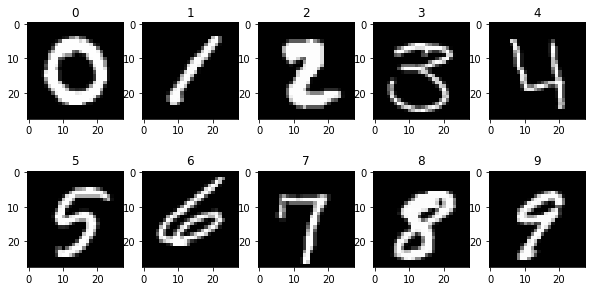

In [4]:
# Find one of each of the digits and plot them out
counter = 0
all_digits_index = []
# Run loops to find one of each of the digits
while (counter < 10):
    for i in range(len(train_labels)):
        if train_labels[i] == counter:
            all_digits_index.append(i)
            counter += 1
            break

# Plot them all in one image
fig = plt.figure(figsize=(10,5))
for i in range(10):
    p = i + 1
    axes = fig.add_subplot(2,5,p)
    plt.imshow(train_data[all_digits_index[i]].reshape(28,28), cmap='gray')
    axes.title.set_text(train_labels[all_digits_index[i]])

## (c)

In [5]:
# Finding the prior prob
print("Prior probability of each digit:")
for i in range(10):
    print(i, ":", round(sum(train_labels == i)/len(train_labels), 5))

Prior probability of each digit:
0 : 0.09838
1 : 0.11152
2 : 0.09945
3 : 0.1036
4 : 0.09695
5 : 0.09036
6 : 0.0985
7 : 0.10479
8 : 0.09674
9 : 0.09971


From the above probabilities, I would say the dataset is very close to an uniform dataset

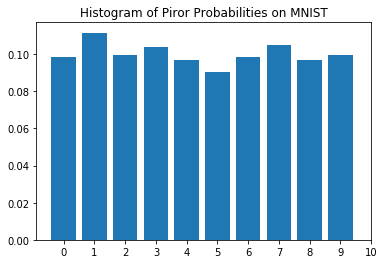

In [6]:
# Plotting histogram
fig, ax = plt.subplots()
bins = np.array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])
_ = ax.hist(train_labels, bins= bins, density=True, rwidth=0.8)
_ = ax.set_xticks(bins+0.5)
_ = ax.title.set_text("Histogram of Piror Probabilities on MNIST")

The histogram seems to be pretty even, but not completely even

## (d)

In [4]:
# The l2 function
def L_2(data_point_1, data_point_2):
    return np.sqrt(np.sum((data_point_1 - data_point_2)**2, axis = 1)).T.tolist()

In [5]:
# Find 1 random datapoint for each digit
counter_1 = 0
all_digits_index_1 = []
# Set a seed for random so we get the same results
np.random.seed(88)
# Run loops to find one of each of the digits
while (counter_1 < 10):
    for i in range(np.random.randint(0, len(train_labels)), len(train_labels)):
        if train_labels[i] == counter_1:
            all_digits_index_1.append(i)
            counter_1 += 1
            break

In [6]:
def nearest_neighbor(data_point, detail = False):
    dist_list = []
    dist_list = L_2(data_point, train_data)
    # Store the original index before sorting
    dist_list_index = []
    for j in range(len(dist_list)):
        dist_list_index.append([j, dist_list[j]])
    # Sort by distance
    dist_list_index.sort(key = lambda l: l[1])
    
    decision_index = []
    decision_list = []
    if detail == True:
        # Only looking at the closest point which also cannot be itself
        decision_index.append(dist_list_index[1][0])
    decision_list.append(train_labels[dist_list_index[1][0]])
    # We want the details to find out why my_KNN failed
    if detail == True:
        return decision_index
    # We do not want to look into the deatils such as which specific index dataset were cloest
    else:
        return decision_list[0]

In [7]:
# Use nearest_neighbor on each of the data points
for o in range(len(all_digits_index_1)):
    random_digit_index = all_digits_index_1[o]
    print("--------")
    print("Original digit:", train_labels[all_digits_index_1[o]])
    print("Nearest Neighbor result:", nearest_neighbor(train_data[all_digits_index_1[o]]))

--------
Original digit: 0
Nearest Neighbor result: 0
--------
Original digit: 1
Nearest Neighbor result: 1
--------
Original digit: 2
Nearest Neighbor result: 2
--------
Original digit: 3
Nearest Neighbor result: 5
--------
Original digit: 4
Nearest Neighbor result: 4
--------
Original digit: 5
Nearest Neighbor result: 5
--------
Original digit: 6
Nearest Neighbor result: 6
--------
Original digit: 7
Nearest Neighbor result: 7
--------
Original digit: 8
Nearest Neighbor result: 8
--------
Original digit: 9
Nearest Neighbor result: 9


Original digit: 3
Nearest Neighbor result:


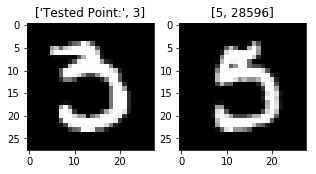

In [11]:
wrong_data_point_index = all_digits_index_1[3]
print("Original digit:", train_labels[wrong_data_point_index])
print("Nearest Neighbor result:")
nearest_neighbor_result = nearest_neighbor(train_data[wrong_data_point_index], detail = True)

# Plot out the original datapoint and the 5 closest datapoints
# Plotting original datapoint
fig = plt.figure(figsize=(5,3))
axes = fig.add_subplot(1,2,1)
plt.imshow(train_data[wrong_data_point_index].reshape(28,28), cmap='gray')
axes.title.set_text(["Tested Point:", train_labels[wrong_data_point_index]])
axes = fig.add_subplot(1,2,2)
plt.imshow(train_data[nearest_neighbor_result[0]].reshape(28,28), cmap='gray')
axes.title.set_text([train_labels[nearest_neighbor_result[0]], nearest_neighbor_result[0]])

The digit 3 was misclassified as 5 because they look very similar. It was misclassified because we only used the nearest neighbor to classify. The classification accuracy will most likely increase once we use more than 1 nearest neighbor to identify these digits.

## (e)

In [8]:
# We take out all the 0 and 1's from the training dataset
data_zeros = train_data[train_labels == 0]
data_ones = train_data[train_labels == 1]

In [9]:
# Using multiprocessing because taking long time
# Generate all indexes for zeros
zeros_index = np.arange(len(data_zeros) - 1).tolist()
        
# Generate all on indexes for ones
ones_index = np.arange(len(data_ones) - 1).tolist()

In [10]:
# Compute all the genuine pairwise distance
# Function to find all zeros genuine pairs distance given index
def find_zeros_genuine_dist(genuine_dist, index):
    dist = L_2(data_zeros[index], data_zeros[index + 1:])
    genuine_dist = genuine_dist + dist
    return genuine_dist
# Function to find all ones genuine pairs distance given index 
def find_ones_genuine_dist(genuine_dist, index):
    dist = L_2(data_ones[index], data_ones[index + 1:])
    genuine_dist = genuine_dist + dist
    return genuine_dist

# Function to find impostor pairs distance, 0 to 1
def find_impostor_dist(impostor_dist, index):
    dist = L_2(data_zeros[index], data_ones)
    impostor_dist = impostor_dist + dist
    return impostor_dist

In [12]:
# For all the genuine pairs of 0's
genuine_dist = mp.Manager().list()
funct_1 = partial(find_zeros_genuine_dist, genuine_dist)
pool_1 = mp.Pool(processes = 8)
genuine_dist_result_1 = pool_1.map(funct_1, zeros_index)
pool_1.close()

In [13]:
# For all the genuine pairs of 1's
genuine_dist_2 = mp.Manager().list()
funct_2 = partial(find_ones_genuine_dist, genuine_dist)
pool_2 = mp.Pool(processes = 8)
genuine_dist_result_2 = pool_2.map(funct_2, ones_index)
pool_2.close()

In [14]:
# Combine two lists
genuine_dist_result = genuine_dist_result_1 + genuine_dist_result_2
# Flatten the list of list into lists
genuine_dist_clean = [item for sublist in genuine_dist_result for item in sublist]

In [15]:
# For all the impostor pairs of 0 to 1's
impostor_dist = mp.Manager().list()
funct_3 = partial(find_impostor_dist, impostor_dist)
pool_3 = mp.Pool(processes = 8)
impostor_dist_result = pool_3.map(funct_3, zeros_index)
pool_3.close()

In [19]:
# Flatten the list
impostor_dist_clean = [item for sublist in impostor_dist_result for item in sublist]

In [20]:
print("The number of genuine pairs is:", len(genuine_dist_clean))
print("The number of impostor pairs is:", len(impostor_dist_clean))

The number of genuine pairs is: 19502232
The number of impostor pairs is: 19349604


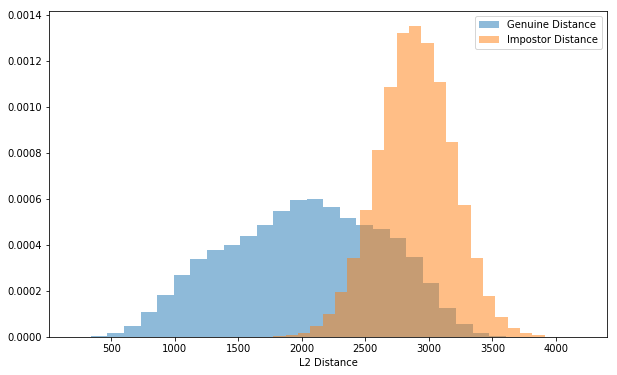

In [21]:
_ = plt.figure(figsize=(10,6))
_ = plt.hist(genuine_dist_clean, bins = 30, alpha = 0.5, label = "Genuine Distance", density = True)
_ = plt.hist(impostor_dist_clean, bins = 30, alpha = 0.5, label = "Impostor Distance", density = True)
_ = plt.legend()
_ = plt.xlabel("L2 Distance")

## (f)

In [22]:
# ROC curve
# We are defining the ROC to be for predicting if the pair of datapoints is genuine or not
# Create the bins or steps for ROC curve, anything higher than the threshhold is predicted as impostor
# And anything lower or equal to the threshhold is predicted as genuine
roc_bins = np.arange(min(genuine_dist_clean), max(impostor_dist_clean),
                     (max(impostor_dist_clean) - min(genuine_dist_clean))/25)

In [23]:
def cal_roc(genuine_dist_clean, impostor_dist_clean, roc_bins):
    perc_genuine = []
    perc_impostor = []
    for i in range(len(roc_bins) - 1):
        perc_genuine.append(sum(genuine_dist_clean < roc_bins[i])/len(genuine_dist_clean))
        perc_impostor.append(sum(impostor_dist_clean < roc_bins[i])/len(impostor_dist_clean))
    return perc_genuine, perc_impostor

In [24]:
# Then we calculate what percentage from each list of genuine and impostor is in that bin range
perc_genuine = []
perc_impostor = []
# To run and calculate, uncomment below
##################
perc_genuine, perc_impostor = cal_roc(genuine_dist_clean, impostor_dist_clean, roc_bins)
# Going to store this data, because it takes a while to run but easy to store and read
roc_df = pd.DataFrame({"bin": roc_bins, "genuine": perc_genuine + [0.00], "impostor": perc_impostor + [0.00]})
roc_df.to_csv("roc_values.csv", index = False)
##################

In [16]:
# If already calculated, just load these data, uncomment below
#roc_df = pd.read_csv("roc_values.csv")
#roc_bins = roc_df.values[:,0]
#perc_genuine = roc_df.values[:-1,1]
#perc_impostor = roc_df.values[:-1,2]

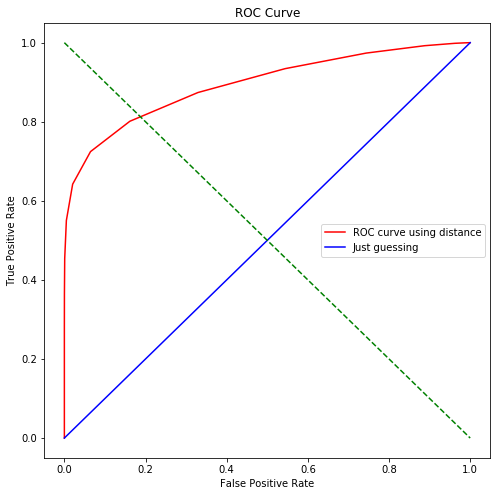

In [17]:
# Drawing ROC curve
_ = plt.figure(figsize=(8,8))
# Plotting ROC curve generated from the distance calculated above
_ = plt.plot(perc_impostor, perc_genuine, 'r', label = "ROC curve using distance")
# Plotting the curve for just guessing
guess_curve = [0, 0.5, 0.5, 1]
equal_error_curve = [1, 0.5, 0.5, 0]
_ = plt.plot(guess_curve, guess_curve, 'b', label = "Just guessing")
_ = plt.plot(guess_curve, equal_error_curve, 'g', linestyle = "--")
_ = plt.title("ROC Curve")
_ = plt.xlabel("False Positive Rate")
_ = plt.ylabel("True Positive Rate")
_ = plt.legend()

## (g)

In [5]:
def my_knn(data_point, train_dat = train_data, train_labs = train_labels, k = [5], detail = False):
    dist_list = []
    dist_list = L_2(data_point, train_dat)
    # Store the original index before sorting
    dist_list_index = []
    for j in range(len(dist_list)):
        dist_list_index.append([j, dist_list[j]])
    # Sort by distance
    dist_list_index.sort(key = lambda l: l[1])
    
    decision_index_all = []
    decision_list_all = []
    for each_k in k:
        decision_index = []
        decision_list = []
        for h in range(1, each_k + 1):
            if detail == True:
                decision_index.append(dist_list_index[h][0])
            decision_list.append(train_labs[dist_list_index[h][0]])
        decision_index_all.append(decision_index)
        decision_list_all.append(decision_list)
    # We want the details to find out why my_KNN failed
    if detail == True:
        return decision_index_all
    # We do not want to look into the deatils such as which specific index dataset were cloest
    else:
        predictions = []
        for each in decision_list_all:
            predictions.append(stats.mode(each)[0][0])
        return predictions

In [60]:
# Find 1 random datapoint for each digit
counter_1 = 0
all_digits_index_1 = []
# Set a seed for random so we get the same results
np.random.seed(2)
# Run loops to find one of each of the digits
while (counter_1 < 10):
    for i in range(np.random.randint(0, len(train_labels)), len(train_labels)):
        if train_labels[i] == counter_1:
            all_digits_index_1.append(i)
            counter_1 += 1
            break

In [61]:
# Use my_KNN on each of the data points
for o in range(len(all_digits_index_1)):
    random_digit_index = all_digits_index_1[o]
    print("--------")
    print("Original digit:", train_labels[all_digits_index_1[o]])
    print("KNN result:", my_knn(train_data[all_digits_index_1[o]])[0])

--------
Original digit: 0
KNN result: 0
--------
Original digit: 1
KNN result: 1
--------
Original digit: 2
KNN result: 2
--------
Original digit: 3
KNN result: 3
--------
Original digit: 4
KNN result: 4
--------
Original digit: 5
KNN result: 5
--------
Original digit: 6
KNN result: 6
--------
Original digit: 7
KNN result: 7
--------
Original digit: 8
KNN result: 5
--------
Original digit: 9
KNN result: 9


### The KNN result for the 8th data point of label 8 is wrong, we will take a closer look at the nearest 5 neighbors

Original digit: 8
KNN result:


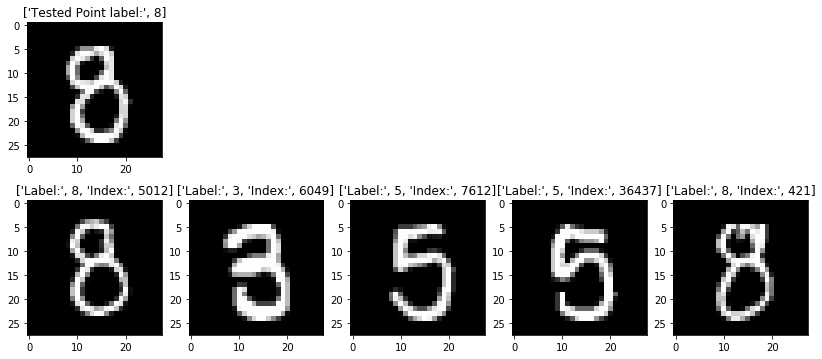

In [86]:
wrong_data_point_index = all_digits_index_1[8]
print("Original digit:", train_labels[wrong_data_point_index])
print("KNN result:")
knn_result = my_knn(train_data[wrong_data_point_index], detail = True)[0]

# Plot out the original datapoint and the 5 closest datapoints
# Plotting original datapoint
fig = plt.figure(figsize=(14,6))
axes = fig.add_subplot(2,5,1)
plt.imshow(train_data[wrong_data_point_index].reshape(28,28), cmap='gray')
axes.title.set_text(["Tested Point label:", train_labels[wrong_data_point_index]])

for o in range(5):
    p = o + 6
    axes = fig.add_subplot(2,5,p)
    plt.imshow(train_data[knn_result[o]].reshape(28,28), cmap='gray')
    axes.title.set_text(["Label:",train_labels[knn_result[o]], "Index:", knn_result[o]])

The number 8 here looks a lot like the number 3 and somewhat looks like 5. There are in total two 3's and two 5's whereas only one 8 is present for the nearest 5 neighbors. As a result, the algorithm generates the result of 3. 

## (h)

In [137]:
# First split the dataset into three parts to use for the 3 fold cross-validation
fold_1_data = train_data[:len(train_data)//3]
fold_1_labels = train_labels[:len(train_labels)//3]

fold_2_data = train_data[len(train_data)//3:2*(len(train_data)//3)]
fold_2_labels = train_labels[len(train_data)//3:2*(len(train_data)//3)]

fold_3_data = train_data[2*(len(train_data)//3):]
fold_3_labels = train_labels[2*(len(train_data)//3):]

# Combine data and label for each fold as validation info
fold_1_info = list(zip(fold_1_labels, fold_1_data))
fold_2_info = list(zip(fold_2_labels, fold_2_data))
fold_3_info = list(zip(fold_3_labels, fold_3_data))

In [138]:
# We want to test and get the best parameter for K
# We will test the result for each validation data point using K = [1,3,5,7,9]
# Create a function to run each fold
def run_fold(knn_results, train_info, validation_info):
    train_lab, train_dat = train_info
    validation_lab, validation_dat = validation_info
    result = my_knn(data_point = validation_dat, train_dat = train_dat, train_labs = train_lab, k = [1,3,5,7,9])
    # Put the results into corresponding list
    knn_results.append([validation_lab, result[0], result[1], result[2], result[3], result[4]])

In [139]:
# Create a global list for multiprocessing to use
knn_results = mp.Manager().list()
# Using multiprocessing to run the first fold as validation
funct_fold_1 = partial(run_fold, knn_results, (np.concatenate((fold_2_labels, fold_3_labels)),
                                               np.concatenate((fold_2_data, fold_3_data), axis = 0)))
pool_fold_1 = mp.Pool(processes = 12)
pool_fold_1.map(funct_fold_1, fold_1_info)
pool_fold_1.close()

# Store the results form the first fold
fold_1_results = list(knn_results)

In [140]:
# Create a global list for multiprocessing to use
knn_results = mp.Manager().list()
# Using multiprocessing to run the first fold as validation
funct_fold_2 = partial(run_fold, knn_results, (np.concatenate((fold_1_labels, fold_3_labels)),
                                               np.concatenate((fold_1_data, fold_3_data), axis = 0)))
pool_fold_2 = mp.Pool(processes = 12)
pool_fold_2.map(funct_fold_2, fold_2_info)
pool_fold_2.close()

# Store the results form the first fold
fold_2_results = list(knn_results)

In [141]:
# Create a global list for multiprocessing to use
knn_results = mp.Manager().list()
# Using multiprocessing to run the first fold as validation
funct_fold_3 = partial(run_fold, knn_results, (np.concatenate((fold_2_labels, fold_3_labels)),
                                               np.concatenate((fold_2_data, fold_3_data), axis = 0)))
pool_fold_3 = mp.Pool(processes = 12)
pool_fold_3.map(funct_fold_3, fold_3_info)
pool_fold_3.close()

# Store the results form the first fold
fold_3_results = list(knn_results)

In [142]:
# Combine the three folds
knn_result_list = fold_1_results + fold_2_results + fold_3_results

In [143]:
# Going to store this KNN results, because it takes a while to run but easy to store and read
knn_df = pd.DataFrame(knn_result_list)
knn_df.columns = ["actual", "k_1", "k_3", "k_5","k_7", "k_9"]
knn_df.to_csv("knn_result.csv", index = False)

In [ ]:
# Read the KNN results in case of crash
#knn_df = pd.read_csv("knn_result.csv")

In [144]:
print("Average accuracy rate of cross validation")
print("K = 1:", sum(knn_df["actual"] == knn_df["k_1"])/len(knn_df["actual"]))
print("K = 3:", sum(knn_df["actual"] == knn_df["k_3"])/len(knn_df["actual"]))
print("K = 5:", sum(knn_df["actual"] == knn_df["k_5"])/len(knn_df["actual"]))
print("K = 7:", sum(knn_df["actual"] == knn_df["k_7"])/len(knn_df["actual"]))
print("K = 9:", sum(knn_df["actual"] == knn_df["k_9"])/len(knn_df["actual"]))

Average accuracy rate of cross validation
K = 1: 0.9578095238095238
K = 3: 0.9599761904761904
K = 5: 0.959452380952381
K = 7: 0.9592619047619048
K = 9: 0.9579285714285715


### So the best K we determined with the current method is 3
The average accuracy rate is around 96%
We will use K = 3 from now on

## (i)

In [212]:
# For k = 3, find all predictions when actual label is from 0 - 9
confusion_0 = pd.DataFrame(knn_df[knn_df["actual"] == 0].groupby('k_3').size(),index=[0,1,2,3,4,5,6,7,8,9]).fillna(0)
confusion_1 = pd.DataFrame(knn_df[knn_df["actual"] == 1].groupby('k_3').size(),index=[0,1,2,3,4,5,6,7,8,9]).fillna(0)
confusion_2 = pd.DataFrame(knn_df[knn_df["actual"] == 2].groupby('k_3').size(),index=[0,1,2,3,4,5,6,7,8,9]).fillna(0)
confusion_3 = pd.DataFrame(knn_df[knn_df["actual"] == 3].groupby('k_3').size(),index=[0,1,2,3,4,5,6,7,8,9]).fillna(0)
confusion_4 = pd.DataFrame(knn_df[knn_df["actual"] == 4].groupby('k_3').size(),index=[0,1,2,3,4,5,6,7,8,9]).fillna(0)
confusion_5 = pd.DataFrame(knn_df[knn_df["actual"] == 5].groupby('k_3').size(),index=[0,1,2,3,4,5,6,7,8,9]).fillna(0)
confusion_6 = pd.DataFrame(knn_df[knn_df["actual"] == 6].groupby('k_3').size(),index=[0,1,2,3,4,5,6,7,8,9]).fillna(0)
confusion_7 = pd.DataFrame(knn_df[knn_df["actual"] == 7].groupby('k_3').size(),index=[0,1,2,3,4,5,6,7,8,9]).fillna(0)
confusion_8 = pd.DataFrame(knn_df[knn_df["actual"] == 8].groupby('k_3').size(),index=[0,1,2,3,4,5,6,7,8,9]).fillna(0)
confusion_9 = pd.DataFrame(knn_df[knn_df["actual"] == 9].groupby('k_3').size(),index=[0,1,2,3,4,5,6,7,8,9]).fillna(0)

In [228]:
confusion_matrix = pd.DataFrame({"0":confusion_0.T.values[0], "1":confusion_1.T.values[0], "2":confusion_2.T.values[0],
                                 "3":confusion_3.T.values[0], "4":confusion_4.T.values[0], "5":confusion_5.T.values[0],
                                 "6":confusion_6.T.values[0], "7":confusion_7.T.values[0], "8":confusion_8.T.values[0],
                                 "9":confusion_9.T.values[0]}, index=[0,1,2,3,4,5,6,7,8,9])
confusion_matrix

,0,1,2,3,4,5,6,7,8,9
0,4100.0,1.0,30,8,4.0,18,29.0,3.0,23,16
1,0.0,4658.0,65,9,49.0,9,8.0,61.0,50,11
2,6.0,10.0,3961,32,1.0,2,4.0,15.0,34,6
3,1.0,2.0,14,4173,0.0,83,0.0,2.0,95,33
4,0.0,2.0,6,2,3882.0,5,5.0,15.0,33,67
5,7.0,0.0,2,51,0.0,3592,16.0,0.0,85,18
6,13.0,2.0,4,2,13.0,44,4073.0,0.0,19,2
7,3.0,7.0,81,25,6.0,4,0.0,4253.0,12,64
8,1.0,1.0,8,28,1.0,10,2.0,0.0,3663,7
9,1.0,1.0,6,21,116.0,28,0.0,52.0,49,3964


In [230]:
# Find what percentage of the predition for each digit
confusion_0_density = confusion_0/confusion_0.sum()
confusion_1_density = confusion_1/confusion_1.sum()
confusion_2_density = confusion_2/confusion_2.sum()
confusion_3_density = confusion_3/confusion_3.sum()
confusion_4_density = confusion_4/confusion_4.sum()
confusion_5_density = confusion_5/confusion_5.sum()
confusion_6_density = confusion_6/confusion_6.sum()
confusion_7_density = confusion_7/confusion_7.sum()
confusion_8_density = confusion_8/confusion_8.sum()
confusion_9_density = confusion_9/confusion_9.sum()

In [231]:
density_matrix = pd.DataFrame({"0":confusion_0_density.T.values[0], "1":confusion_1_density.T.values[0],
                               "2":confusion_2_density.T.values[0], "3":confusion_3_density.T.values[0],
                               "4":confusion_4_density.T.values[0], "5":confusion_5_density.T.values[0],
                               "6":confusion_6_density.T.values[0], "7":confusion_7_density.T.values[0],
                               "8":confusion_8_density.T.values[0], "9":confusion_9_density.T.values[0]},
                              index=[0,1,2,3,4,5,6,7,8,9])
density_matrix

,0,1,2,3,4,5,6,7,8,9
0,0.992256,0.000213,0.007182,0.001839,0.000982,0.004743,0.007010,0.000682,0.005661,0.003820
1,0.000000,0.994449,0.015561,0.002068,0.012033,0.002372,0.001934,0.013860,0.012306,0.002627
2,0.001452,0.002135,0.948288,0.007355,0.000246,0.000527,0.000967,0.003408,0.008368,0.001433
3,0.000242,0.000427,0.003352,0.959090,0.000000,0.021871,0.000000,0.000454,0.023382,0.007880
4,0.000000,0.000427,0.001436,0.000460,0.953340,0.001318,0.001209,0.003408,0.008122,0.015998
5,0.001694,0.000000,0.000479,0.011721,0.000000,0.946509,0.003868,0.000000,0.020921,0.004298
6,0.003146,0.000427,0.000958,0.000460,0.003193,0.011594,0.984530,0.000000,0.004676,0.000478
7,0.000726,0.001494,0.019392,0.005746,0.001473,0.001054,0.000000,0.966371,0.002953,0.015282
8,0.000242,0.000213,0.001915,0.006435,0.000246,0.002635,0.000483,0.000000,0.901551,0.001671
9,0.000242,0.000213,0.001436,0.004826,0.028487,0.007378,0.000000,0.011815,0.012060,0.946514


## (j)

In [6]:
# Combine data and index number for testing dataset, so multiprocessing do not mess it up
test_index = np.arange(1, len(test_data) + 1).tolist()
test_info = list(zip(test_index, test_data))

In [7]:
# We use K = 3 for the final model
# Create a function to run the knn
def run_knn(knn_res, test_info):
    test_index, test_dat = test_info
    result = my_knn(data_point = test_dat, k = [3])
    # Put the results into list
    knn_res.append([test_index, result[0]])

In [8]:
# Create a global list for multiprocessing to use
knn_res = mp.Manager().list()
# Using multiprocessing to run the first fold as validation
funct_knn_final = partial(run_knn, knn_res)
pool_fold_final = mp.Pool(processes = 12)
pool_fold_final.map(funct_knn_final, test_info)
pool_fold_final.close()

# Store the results form the first fold
final_results = list(knn_res)

In [9]:
# Put the results back in index order
final_sorted_result = list(final_results)
final_sorted_result.sort(key = lambda l: l[0])

In [10]:
# Put answer into proper kaggle format
final_ans = pd.DataFrame(final_sorted_result, columns = ["ImageId", "Label"])
final_ans.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [11]:
# Save solution
final_ans.to_csv("assignment_1_knn_results.csv", index = False)